### Universidad del Valle de Guatemala
#### Deep Learning
##### Recomenadaciones basadas en contenido
##### Integrantes:
1. Jose Hernandez 20053
2. Pablo Gonzalez 20362


##### Impotar librerias

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense


#### Leer data

In [15]:
data = pd.read_csv('./data/merged_data.csv')

Mostrar las primeras 5 filas de la data

In [16]:
data.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


Describe de las variables numericas en el dataset

In [17]:
data.describe()

,User-ID,Book-Rating,Year-Of-Publication
count,1.031e+06,1.031e+06,1.031e+06
mean,1.406e+05,2.839e+00,1.968e+03
std,8.052e+04,3.854e+00,2.311e+02
min,2.000e+00,0.000e+00,0.000e+00
25%,7.042e+04,0.000e+00,1.992e+03
50%,1.412e+05,0.000e+00,1.997e+03
75%,2.114e+05,7.000e+00,2.001e+03
max,2.789e+05,1.000e+01,2.050e+03


Shape del dataset

In [19]:
data.shape

(1031136, 7)

Tipos de datos en el dataset

In [20]:
data.dtypes

User-ID                 int64
ISBN                   object
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
dtype: object

Verificar si hay valores Nulos

In [21]:
print(data.isnull().sum())

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64


Eliminar las filas vacias

In [24]:
data = data.dropna()

Valores unicos por columna

In [25]:
print(data.nunique())

User-ID                 92106
ISBN                   270148
Book-Rating                11
Book-Title             241069
Book-Author            101587
Year-Of-Publication       116
Publisher               16728
dtype: int64


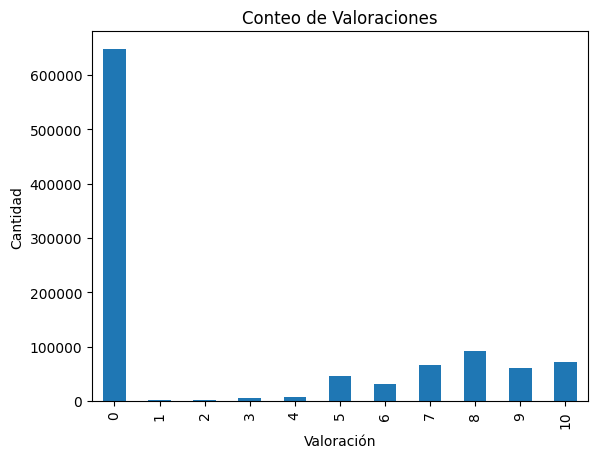

In [26]:
data['Book-Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Conteo de Valoraciones')
plt.xlabel('Valoración')
plt.ylabel('Cantidad')
plt.show()


In [28]:
media_valoraciones = data['Book-Rating'].mean()
media_valoraciones

2.8390343437752454

### Label Encoder

In [30]:
label_encoder = LabelEncoder()
data['Book-Title'] = label_encoder.fit_transform(data['Book-Title'])
data['Book-Author'] = label_encoder.fit_transform(data['Book-Author'])
data['Publisher'] = label_encoder.fit_transform(data['Publisher'])

In [31]:
features = data[['Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
target = data['Book-Rating']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [35]:
model = Sequential()
model.add(Dense(64, input_dim=features.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [36]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [37]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
25779/25779 [==============================] - 22s 850us/step - loss: 16457.9434 - mean_squared_error: 16457.9434 - val_loss: 1307.3268 - val_mean_squared_error: 1307.3268
Epoch 2/10
25779/25779 [==============================] - 21s 817us/step - loss: 733.8572 - mean_squared_error: 733.8572 - val_loss: 49.6221 - val_mean_squared_error: 49.6221
Epoch 3/10
25779/25779 [==============================] - 21s 819us/step - loss: 65.0077 - mean_squared_error: 65.0077 - val_loss: 21.6545 - val_mean_squared_error: 21.6545
Epoch 4/10
25779/25779 [==============================] - 21s 817us/step - loss: 15.4896 - mean_squared_error: 15.4896 - val_loss: 14.8729 - val_mean_squared_error: 14.8729
Epoch 5/10
25779/25779 [==============================] - 22s 860us/step - loss: 14.8503 - mean_squared_error: 14.8503 - val_loss: 14.8727 - val_mean_squared_error: 14.8727
Epoch 6/10
25779/25779 [==============================] - 22s 872us/step - loss: 14.8504 - mean_squared_error: 14.8504 - va

In [38]:
loss, mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")

6445/6445 [==============================] - 4s 618us/step - loss: 14.8734 - mean_squared_error: 14.8734
Mean Squared Error: 14.873394012451172


### Prediccion del modelo

In [53]:
user_id = 276725

# Filtrar los libros que el usuario no ha valorado
unrated_books = data[~data['User-ID'].isin([user_id])][['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']].drop_duplicates()


In [54]:
# Hacer predicciones para los libros no valorados por el usuario
predicciones = model.predict(unrated_books)

# Agregar las predicciones al DataFrame de libros no valorados
unrated_books['Predicted-Rating'] = predicciones

# Ordenar los libros no valorados por las valoraciones predichas de mayor a menor
libros_recomendados = unrated_books.sort_values(by='Predicted-Rating', ascending=False)

# Mostrar los libros recomendados
print(libros_recomendados.head(10)) 

8401/8401 [==============================] - 5s 589us/step
        Book-Title  Book-Author  Publisher  Year-Of-Publication  Predicted-Rating
912132         196          691      15860                 2001            16.803
343126          72         3849      16497                 2001            15.078
786054         290          829      14343                 1999            15.038
810814        1819          819      16173                 2000            14.545
834722        1654         1267      16173                 1999            14.092
888785        1626         1322      16138                 1998            14.009
924764         935         2470      16445                 2003            13.809
598417          63         4326      15646                 1983            13.771
977130         972          740      13593                 1991            13.041
786076         302          732      11194                    0            12.928


### Recomendaciones para el usuario 276725

In [55]:
# Crear un diccionario que mapee los valores transformados a sus valores originales
dict_book_title = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
dict_book_author = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
dict_publisher = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Revertir la transformación en las predicciones
libros_recomendados['Book-Title'] = libros_recomendados['Book-Title'].map(dict_book_title)
libros_recomendados['Book-Author'] = libros_recomendados['Book-Author'].map(dict_book_author)
libros_recomendados['Publisher'] = libros_recomendados['Publisher'].map(dict_publisher)

print(libros_recomendados[['Book-Title', 'Book-Author', 'Publisher']].head(10))


                                               Book-Title                         Book-Author  \
912132                                  About Comics, LLC       American Technical Publishers   
343126                                A. &amp; M. Muchnik                       Dawn Horse Pr   
786054  Addison Wesley Higher Education (a Pearson Edu...                           Apostrofe   
810814                               Bilingual Books (WA)                          Anvil/PALH   
834722                                     Belles lettres                   Ayers &amp; James   
888785                          Beech Tree Paperback Book    BVU Buchverlag Union GmbH Berlin   
924764                                           Ariel Pr  C. Hurst &amp; Co (Publishers) Ltd   
598417                                          A V Pubns                           Drag City   
977130                                              Arrow                 Anchor Distributors   
786076                        

In [56]:
model.save('./Modelos/modellimpio.h5')